In [1]:
# importer et visualiser les données

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./colornames.csv')
df.drop('good name', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    30200 non-null  object
 1   hex     30200 non-null  object
dtypes: object(2)
memory usage: 472.0+ KB


In [3]:
df['red'] = df['hex'].str[1:3].apply(int, base=16)
df['green'] = df['hex'].str[3:5].apply(int, base=16)
df['blue'] = df['hex'].str[5:7].apply(int, base=16)
df.head()

,name,hex,red,green,blue
0,100 Mph,#c93f38,201,63,56
1,18th Century Green,#a59344,165,147,68
2,1975 Earth Red,#7b463b,123,70,59
3,1989 Miami Hotline,#dd3366,221,51,102
4,20000 Leagues Under the Sea,#191970,25,25,112


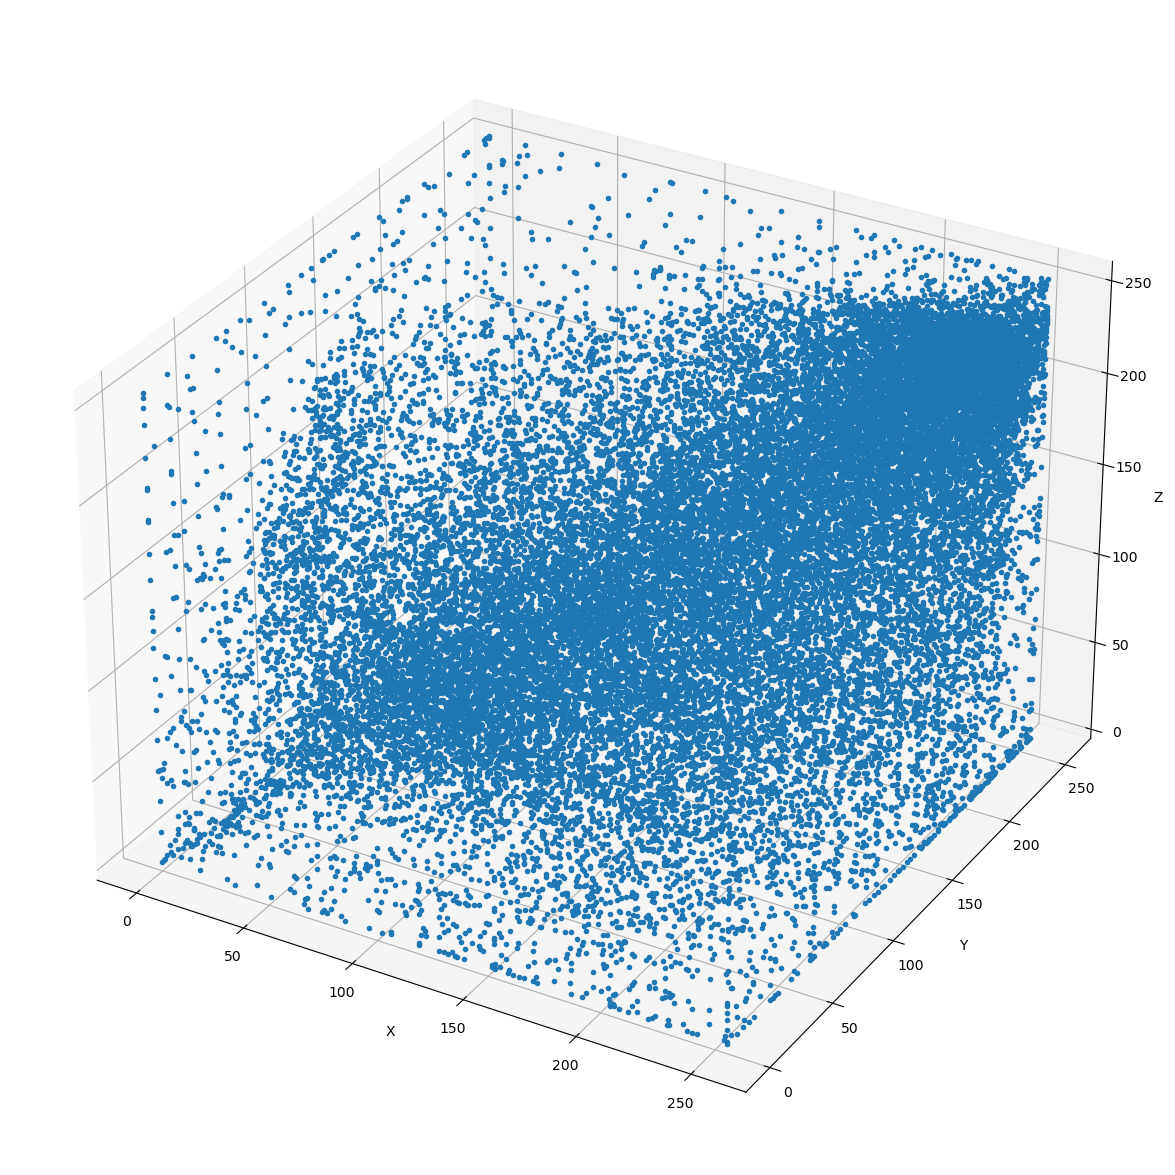

In [4]:
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.plot(df['red'], df['green'], df['blue'], '.')

In [13]:
from sklearn.cluster import KMeans

cols = df.drop(['name', 'hex'], axis=1).to_numpy()

km = KMeans(n_clusters=12, random_state=49, n_init='auto')
km.fit(cols)

color_centers = np.round(km.cluster_centers_).astype(int)
color_centers

print(km.labels_.shape)


(30200,)


In [17]:
# création d’une table des couleurs moyennes
def tohexcolor(arr):
    r = '{:02x}'.format(arr[0])
    g = '{:02x}'.format(arr[1])
    b = '{:02x}'.format(arr[2])

    return f'#{r}{g}{b}'

hex_centers = np.apply_along_axis(tohexcolor, 1, color_centers)
hex_centers

array(['#e1be94', '#1d706e', '#e8e1d7', '#c47e5a', '#3a95bf', '#6e6156',
       '#393337', '#90948c', '#afc2c6', '#dabf25', '#c0312c', '#c333bc'],
      dtype='<U7')

In [15]:
from IPython.display import display, HTML

def colorcell(color, width=60, height=60, text='', textcolor='black'):
    tex = f'color:{textcolor}'
    col = f'background:{color}'
    wid = f'width:{width}px'
    hei = f'height:{height}px'
    styles = [tex, col, wid, hei]
    style = f' style="{";".join(styles)}"'

    return f'<div{style}>{text}</div>'

def palette(colorlist):
    insert = ''
    for col in colorlist:
        insert += colorcell(col, 160, text=col)
    return f'<div style="display:flex;flex-flow:row wrap">{insert}</div>'


display(HTML(palette(list(hex_centers))))

2     5698
5     3866
7     3343
0     3200
8     3127
3     2249
6     2162
1     1698
10    1652
9     1388
4     1294
11     523
Name: labelz, dtype: int64


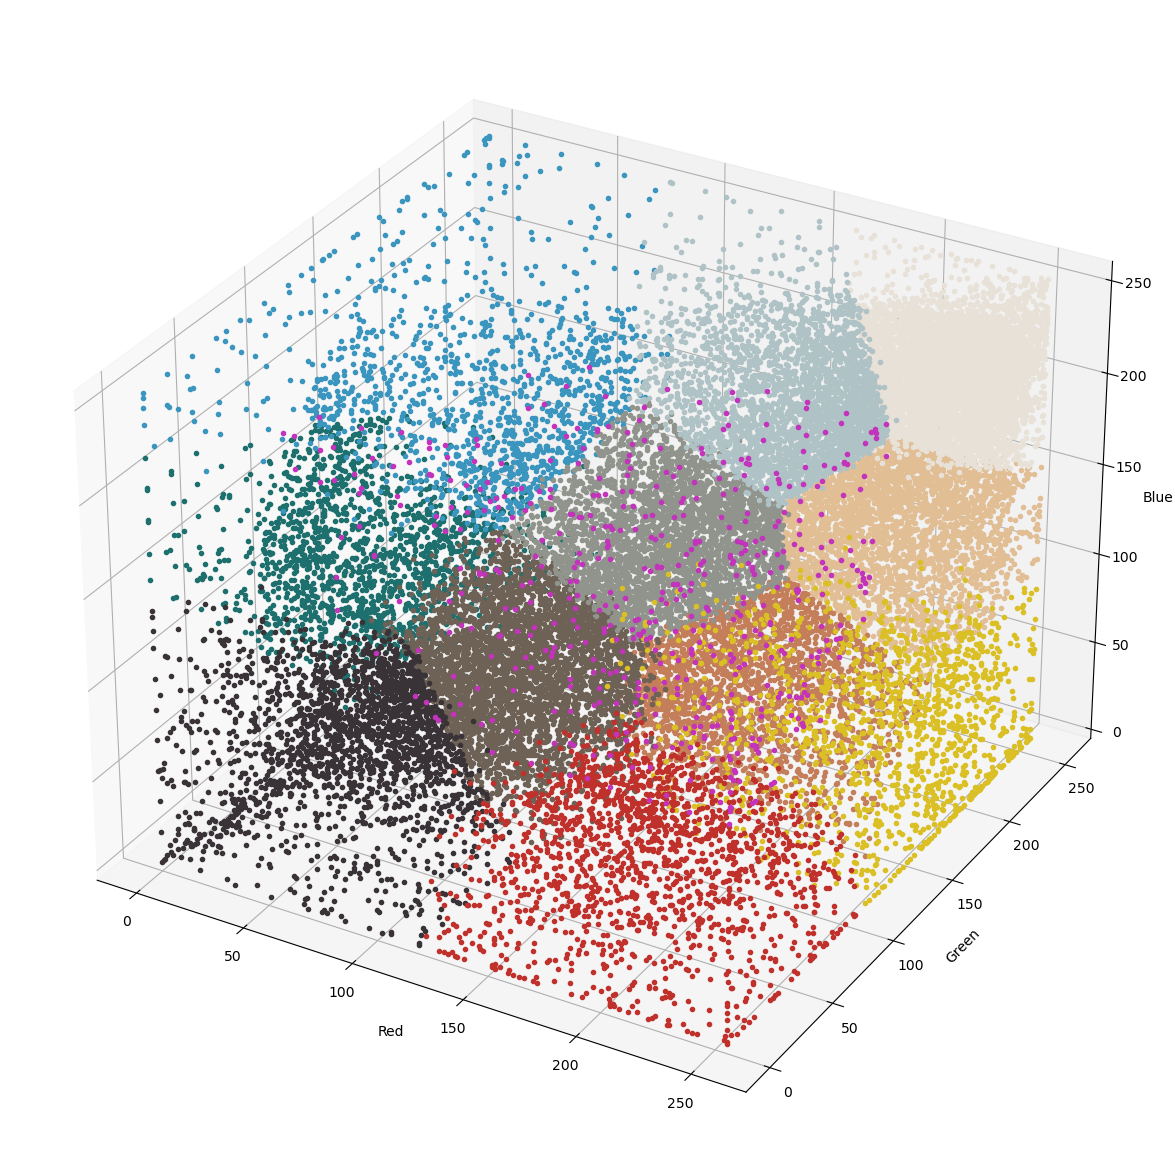

In [16]:
dftri = df.copy()
dftri['labelz'] = km.labels_

print(dftri['labelz'].value_counts())

ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

for i in range(12):
    points = dftri.loc[dftri['labelz'] == i]
    ax.plot(points['red'], points['green'], points['blue'], '.', color=hex_centers[i])
